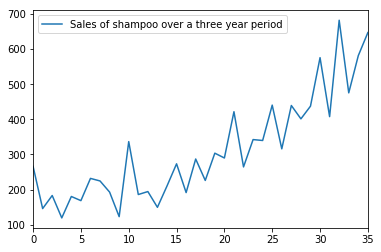

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_dataset = pd.read_csv(r"C:\Users\Chaitra\Desktop\sales_of_shampoo_over_a_three_ye.csv")
csv_dataset.plot()
plt.show()

In [3]:
optimal_alpha = None
optimal_gamma = None
best_mse = None
db = csv_dataset.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_alpha_gamma_values = np.zeros((9, 9))
for gamma in range(0, 9):
    for alpha in range(0, 9):
        pt = db[0][0]
        bt = db[1][0] - db[0][0]
        mean_for_alpha_gamma = np.zeros(len(db))
        mean_for_alpha_gamma[0] = np.power(db[0][0] - pt, 2)
        for i in range(1, len(db)):
            temp_pt = ((alpha + 1) * 0.1) * db[i][0] + (1 - ((alpha + 1) * 0.1)) * (pt + bt)
            bt = ((gamma + 1) * 0.1) * (temp_pt - pt) + (1 - ((gamma + 1) * 0.1)) * bt
            pt = temp_pt
            mean_for_alpha_gamma[i] = np.power(db[i][0] - pt, 2)
        mean_results_for_all_possible_alpha_gamma_values[gamma][alpha] = np.mean(mean_for_alpha_gamma)
        optimal_gamma, optimal_alpha = np.unravel_index(
            np.argmin(mean_results_for_all_possible_alpha_gamma_values),
            np.shape(mean_results_for_all_possible_alpha_gamma_values))
optimal_alpha = (optimal_alpha + 1) * 0.1
optimal_gamma = (optimal_gamma + 1) * 0.1
best_mse = np.min(mean_results_for_all_possible_alpha_gamma_values)
print("Best MSE = %s" % best_mse)
print("Optimal alpha = %s" % optimal_alpha)
print("Optimal gamma = %s" % optimal_gamma)

Best MSE = 125.81620704283071
Optimal alpha = 0.9
Optimal gamma = 0.2


In [4]:
pt = db[0][0]
bt = db[1][0] - db[0][0]
for i in range(1, len(db)):
    temp_pt = optimal_alpha * db[i][0] + (1 - optimal_alpha) * (pt + bt)
    bt = optimal_gamma * (temp_pt - pt) + (1 - optimal_gamma) * bt
    pt = temp_pt
print("P_t = %s" % pt)
print("b_t = %s" % bt )

P_t = 641.6334222987338
b_t = 30.033728841040205


In [5]:
print("Next observation = %s" % (pt + (1 * bt)))

Next observation = 671.667151139774


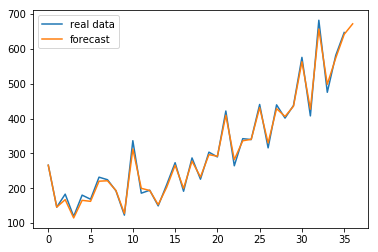

In [6]:
forecast = np.zeros(len(db) + 1)
pt = db[0][0]
bt = db[1][0] - db[0][0]
forecast[0] = pt
for i in range(1, len(db)):
    temp_pt = optimal_alpha * db[i][0] + (1 - optimal_alpha) * (pt + bt)
    bt = optimal_gamma * (temp_pt - pt) + (1 - optimal_gamma) * bt
    pt = temp_pt
    forecast[i] = pt
forecast[-1] = pt + (1 * bt)
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()